### Time Series Activity 1
#### PLDT Dataset

Mary Rose Redilla BSCS 3A

In [1]:
# the record is from March 1 to July 30, 2020

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("pltd_nodates.csv")
df.head()

,Open,High,Low,Close,Volume
0,"1,320.00","1,344.00","1,316.00","1,340.00","176,975"
1,"1,301.00","1,319.00","1,300.00","1,316.00","63,620"
2,"1,288.00","1,327.00","1,272.00","1,327.00","231,930"
3,"1,339.00","1,339.00","1,316.00","1,320.00","67,530"
4,"1,339.00","1,343.00","1,305.00","1,340.00","82,230"


In [2]:
df = df.iloc[::-1]
df

,Open,High,Low,Close,Volume
101,980,"1,009.00",976,982.5,"84,890"
100,995,"1,007.00",994.5,"1,002.00","150,640"
99,"1,000.00","1,015.00",990.5,"1,015.00","71,995"
98,"1,015.00","1,059.00","1,002.00","1,043.00","282,670"
97,"1,043.00","1,062.00","1,025.00","1,059.00","278,005"
...,...,...,...,...,...
4,"1,339.00","1,343.00","1,305.00","1,340.00","82,230"
3,"1,339.00","1,339.00","1,316.00","1,320.00","67,530"
2,"1,288.00","1,327.00","1,272.00","1,327.00","231,930"
1,"1,301.00","1,319.00","1,300.00","1,316.00","63,620"


In [3]:
# sets the range starting from March 1, 2020 to see the number of days that don't have trades including the weekends

rng = pd.date_range(start='2020-03-01', periods=102, freq='B')
df.index = rng
rng

DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13',
               ...
               '2020-07-08', '2020-07-09', '2020-07-10', '2020-07-13',
               '2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17',
               '2020-07-20', '2020-07-21'],
              dtype='datetime64[ns]', length=102, freq='B')

In [4]:
# localizing the dataset

df.index = df.index.tz_localize(tz="Asia/Manila")
df.index

DatetimeIndex(['2020-03-02 00:00:00+08:00', '2020-03-03 00:00:00+08:00',
               '2020-03-04 00:00:00+08:00', '2020-03-05 00:00:00+08:00',
               '2020-03-06 00:00:00+08:00', '2020-03-09 00:00:00+08:00',
               '2020-03-10 00:00:00+08:00', '2020-03-11 00:00:00+08:00',
               '2020-03-12 00:00:00+08:00', '2020-03-13 00:00:00+08:00',
               ...
               '2020-07-08 00:00:00+08:00', '2020-07-09 00:00:00+08:00',
               '2020-07-10 00:00:00+08:00', '2020-07-13 00:00:00+08:00',
               '2020-07-14 00:00:00+08:00', '2020-07-15 00:00:00+08:00',
               '2020-07-16 00:00:00+08:00', '2020-07-17 00:00:00+08:00',
               '2020-07-20 00:00:00+08:00', '2020-07-21 00:00:00+08:00'],
              dtype='datetime64[ns, Asia/Manila]', length=102, freq=None)

In [5]:
# custom calendar for PH Holidays from Mar 1 - Jul 30 2020

from pandas.tseries.offsets import CustomBusinessDay
from pandas.tseries.holiday import AbstractHolidayCalendar, nearest_workday, Holiday

class myCustomCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday("Implementation of Nationwide Community Quarantine for COVID-19 Pandemic", month=3, day=17),
        Holiday("Implementation of Nationwide Community Quarantine for COVID-19 Pandemic",month=3, day=18),
        Holiday("Day of Valor and Maundy Thursday", month=4, day=9),
        Holiday("Good Friday", month=4, day=10),
        Holiday("Labour Day", month=5, day=1),
        Holiday("Eid al-Fitr", month=5, day=4),
        Holiday("Philippine Independence Day", month=6, day=12)
    ]
ph_holidays = CustomBusinessDay(calendar=myCustomCalendar())

rng = pd.date_range('2020-03-01', '2020-07-30', freq=ph_holidays)
df.index = rng
df.index

DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-09', '2020-03-10', '2020-03-11',
               '2020-03-12', '2020-03-13',
               ...
               '2020-07-17', '2020-07-20', '2020-07-21', '2020-07-22',
               '2020-07-23', '2020-07-24', '2020-07-27', '2020-07-28',
               '2020-07-29', '2020-07-30'],
              dtype='datetime64[ns]', length=102, freq='C')

In [6]:
df.tail()

,Open,High,Low,Close,Volume
2020-07-24,"1,339.00","1,343.00","1,305.00","1,340.00","82,230"
2020-07-27,"1,339.00","1,339.00","1,316.00","1,320.00","67,530"
2020-07-28,"1,288.00","1,327.00","1,272.00","1,327.00","231,930"
2020-07-29,"1,301.00","1,319.00","1,300.00","1,316.00","63,620"
2020-07-30,"1,320.00","1,344.00","1,316.00","1,340.00","176,975"


In [7]:
df = df.apply(lambda x: x.str.replace(',',''))

In [8]:
df.apply(pd.to_numeric)

,Open,High,Low,Close,Volume
2020-03-02,980.0,1009.0,976.0,982.5,84890
2020-03-03,995.0,1007.0,994.5,1002.0,150640
2020-03-04,1000.0,1015.0,990.5,1015.0,71995
2020-03-05,1015.0,1059.0,1002.0,1043.0,282670
2020-03-06,1043.0,1062.0,1025.0,1059.0,278005
...,...,...,...,...,...
2020-07-24,1339.0,1343.0,1305.0,1340.0,82230
2020-07-27,1339.0,1339.0,1316.0,1320.0,67530
2020-07-28,1288.0,1327.0,1272.0,1327.0,231930
2020-07-29,1301.0,1319.0,1300.0,1316.0,63620


In [9]:
df.astype(float)

,Open,High,Low,Close,Volume
2020-03-02,980.0,1009.0,976.0,982.5,84890.0
2020-03-03,995.0,1007.0,994.5,1002.0,150640.0
2020-03-04,1000.0,1015.0,990.5,1015.0,71995.0
2020-03-05,1015.0,1059.0,1002.0,1043.0,282670.0
2020-03-06,1043.0,1062.0,1025.0,1059.0,278005.0
...,...,...,...,...,...
2020-07-24,1339.0,1343.0,1305.0,1340.0,82230.0
2020-07-27,1339.0,1339.0,1316.0,1320.0,67530.0
2020-07-28,1288.0,1327.0,1272.0,1327.0,231930.0
2020-07-29,1301.0,1319.0,1300.0,1316.0,63620.0


In [12]:
df['Close'] = pd.to_numeric(df['Close'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 102 entries, 2020-03-02 to 2020-07-30
Freq: C
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    102 non-null    object 
 1   High    102 non-null    object 
 2   Low     102 non-null    object 
 3   Close   102 non-null    float64
 4   Volume  102 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.8+ KB


<AxesSubplot:>

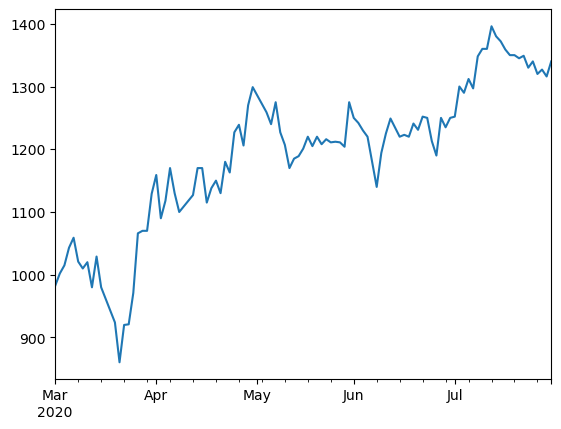

In [14]:
df['Close'].plot.line()

Analysis:

Based on the graph, the stock market of PLDT has experienced overall growth from February 1 to June 30, 2016 with some periods where the line on the graph dips down and continue to rise again.